![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Importación de librerías
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [4]:
season_map = {1: 'Invierno', 2: 'Primavera', 3: 'Verano', 4: 'Otoño'}
bikes['season_label'] = bikes['season'].map(season_map)
bikes

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,season_label
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,Invierno
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,Invierno
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,Invierno
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,Invierno
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,Invierno
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,Otoño
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,Otoño
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,Otoño


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [5]:
# Celda 1.1
estacion=bikes.groupby('season_label').total.mean()
estacion

season_label
Invierno     116.343261
Otoño        198.988296
Primavera    215.251372
Verano       234.417124
Name: total, dtype: float64

In [6]:
print(f"Estación con mayor alquiler promedio: {estacion.idxmax()} con {estacion.max()}")
print(f"Estación con menor alquiler promedio: {estacion.idxmin()} con {estacion.min()}")

Estación con mayor alquiler promedio: Verano con 234.417124039517
Estación con menor alquiler promedio: Invierno con 116.34326135517499


In [7]:
# Celda 1.2
hora=bikes.groupby('hour').total.mean()
hora

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [8]:
print(f"Hora con mayor alquiler promedio: {hora.idxmax()} con {hora.max()}")
print(f"Hora con menor alquiler promedio: {hora.idxmin()} con {hora.min()}")

Hora con mayor alquiler promedio: 17 con 468.765350877193
Hora con menor alquiler promedio: 4 con 6.407239819004525


In [9]:
bikes["hour"].describe()

count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

* Es notable el que el uso de biciletas es mucho mayor en las temporadas: Verano y Primavera.
* En las temporadas más frías, es menor el uso de bicis.
* Por hora, se observan dos picos:en la mañana (7-9 am); en la tarde (4-7 pm). Puede estar asociado a trayectos para ir a trabajar e ir a casa

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

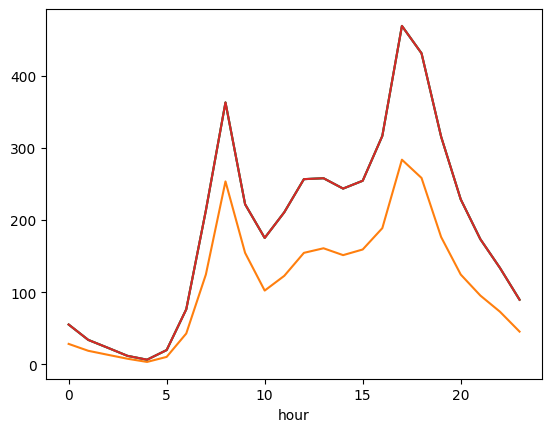

In [14]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()
plt.show()

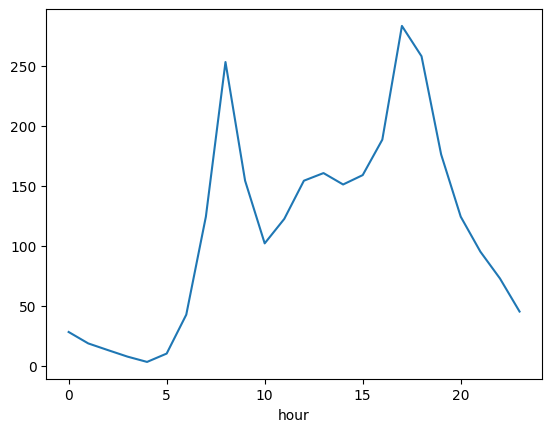

In [15]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes.loc[bikes["season"]==1].groupby('hour').total.mean().plot()
plt.show()

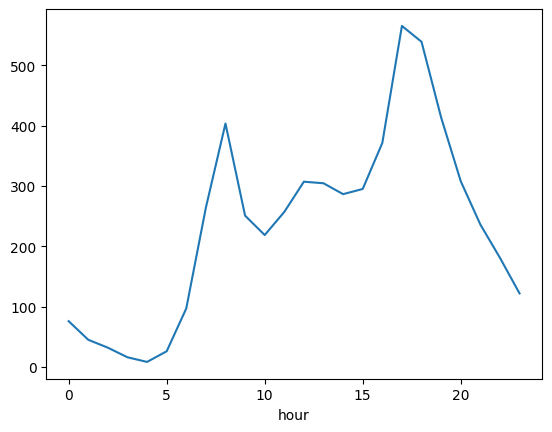

In [16]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes.loc[bikes["season"]==3].groupby('hour').total.mean().plot()
plt.show()

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a un conjunto de train de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [34]:
# Celda 3

X = bikes[['season', 'hour']].reset_index(drop=True)
X = pd.get_dummies(X, columns=['season'], drop_first=True).astype(int)
y = bikes['total'].reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())
# Guardar R² del modelo de entrenamiento
r2_lineal = model.rsquared


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     619.4
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:00:13   Log-Likelihood:                -56534.
No. Observations:                8708   AIC:                         1.131e+05
Df Residuals:                    8703   BIC:                         1.131e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9195      4.505     -1.314      0.1

### Resultado del modelo de regresión lineal (OLS)

**Resumen de coeficientes:**

| Variable     | Coeficiente | Interpretación |
|--------------|-------------|----------------|
| const        | -5.91      | Intercepto base |
| hour         | 10.56      | Por cada hora adicional, el total de alquileres aumenta en promedio 10.55 unidades |
| season_2     | 99.106      | En primavera, se alquilan en promedio 100.32 bicicletas más que en invierno |
| season_3     | 119.04      | En verano, se alquilan en promedio 119.47 bicicletas más que en invierno |
| season_4     | 84.94      | En otoño, se alquilan en promedio 84.08 bicicletas más que en invierno |

**R² del modelo:** 0.22  
El modelo explica el 22% de la variabilidad en el total de alquileres de bicicletas. A pesar de que `hour` y `season` tienen un impacto significativo, el poder predictivo es pobre. Esto se debe a que una de las principales limitaciones es que la relación entre hours y total es no lienal, ya que tenemos picos en 2 momentos del día. Por otro lado, la variable season por si sola puede no logra captar las variaciones en los datos.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [35]:
X

,hour,season_2,season_3,season_4
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
...,...,...,...,...
10881,19,0,0,1
10882,20,0,0,1
10883,21,0,0,1
10884,22,0,0,1


In [24]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

# Función de impureza para regresión: MSE
def mse(y):
    if y.shape[0] == 0:
        return 0
    else:
        return np.mean((y - y.mean())**2)

# Cálculo de ganancia usando MSE
def mse_impurity(X_col, y, split):
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    mse_total = mse(y)
    mse_l = mse(y_l)
    mse_r = mse(y_r)
    
    mse_gain = mse_total - (n_l / (n_l + n_r) * mse_l + n_r / (n_l + n_r) * mse_r)
    
    return mse_gain

In [25]:
# Encontrar el mejor split para regresión
def best_split_reg(X, y, num_pct=10):
    features = range(X.shape[1])
    best_split = [0, 0, -np.inf]  # j, split, gain
    
    for j in features:
        splits = np.percentile(X.iloc[:, j], np.linspace(0, 100, num_pct + 2)[1:-1])
        splits = np.unique(splits)
        
        for split in splits:
            gain = mse_impurity(X.iloc[:, j], y, split)
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Crecimiento recursivo del árbol de regresión
def tree_grow_reg(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[0], level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    j, split, gain = best_split_reg(X, y, num_pct)
    y_pred = y.mean()
    
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    
    if gain < min_gain or (max_depth is not None and level >= max_depth):
        return tree
    
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]
    
    tree['sl'] = tree_grow_reg(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow_reg(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [26]:
# Aplicación de la función tree_grow
tree=tree_grow_reg(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': 191.57413191254824,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': 9134.40591176651,
 'sl': {'y_pred': 55.437673900946024,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 3594,
  'gain': 3603.8503299798276,
  'sl': {'y_pred': 32.58203249442498,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 3139,
   'gain': 323.4004463794779,
   'sl': {'y_pred': 25.177719821162444,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 191.40441543023144},
   'sr': {'y_pred': 76.25934065934067,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 140.78707852208026}},
  'sr': {'y_pred': 213.11648351648353,
   'level': 2,
   'split': [2, 1.0],
   'n_samples': 455,
   'gain': 866.7691640814373,
   'sl': {'y_pred': 196.09384164222874,
    'level': 3,
    'split': -1,
    'n_samples': 341,
    'gain': 656.9912596996946},
   'sr': {'y_pred': 264.03508771929825,
    'level': 3,
    'split': -1,
    'n_samples': 114,
    'gain': 0.0}}},
 'sr': {'y_

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Tenga en cuenta que, a diferencia del laboratorio, este problema es de regresión. Por lo tanto, para hacer cada split del árbol se debe utilizar algún criterio apropiado para problemas de regresión.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Partición
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo base
modelo = DecisionTreeRegressor(random_state=42)

# Grilla de búsqueda
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [10, 30, 50, 100],
    'min_samples_split': [2, 10, 20]
}

# GridSearchCV con métrica predefinida
grid = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)


In [28]:
# Ajustar
grid.fit(X_train, y_train)

# Resultados
print("Mejores parámetros encontrados:")
print(grid.best_params_)
print(f"Mejor RMSE (validación cruzada): {abs(grid.best_score_):.2f}")

Mejores parámetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Mejor RMSE (validación cruzada): 0.60


In [29]:
from sklearn.metrics import r2_score

# Mejor modelo encontrado
mejor_modelo = grid.best_estimator_

# Predecir en validación
y_pred_val = mejor_modelo.predict(X_val)

# R² en validación
r2_arbol = r2_score(y_val, y_pred_val)
print(f"R² del árbol en validación: {r2_arbol:.3f}")


R² del árbol en validación: 0.592


In [30]:
print(f"R² del árbol en validación: {r2_arbol:.3f}")
print(f"R² del regresión lineal: {r2_lineal:.3f}")

R² del árbol en validación: 0.592
R² del regresión lineal: 0.222


se puede notar un gran incremento en el R² al usar el arbol de decision

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [37]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [38]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [39]:
y

0       1
1       0
2       0
3       0
4       0
       ..
5995    0
5996    1
5997    0
5998    0
5999    1
Name: Popular, Length: 6000, dtype: int64

In [40]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [41]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# 1. Árbol de decisión con calibración de max_depth
param_grid = {'max_depth': [3, 5, 10, 20]}
tree = DecisionTreeClassifier(random_state=1)
grid_tree = GridSearchCV(tree, param_grid, cv=5)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [3, 5, 10, 20]})

In [42]:
y_pred_tree = grid_tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print(f"Árbol de decisión - Accuracy: {acc_tree:.3f}, F1 Score: {f1_tree:.3f}")

Árbol de decisión - Accuracy: 0.641, F1 Score: 0.607


EL arbol de decisión con max_depth:3 obtiene mejor resultados para el accuracy y el F1-Score. Eso sugiere que el árbol captura mejor las relaciones entre las variables versus la regresión logística

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras de bootstrap vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras de bootstrap vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras de bootstrap vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [43]:
# Celda 7
n_estimators = 100
np.random.seed(42)
n_samples = X_train.shape[0]
samples_depth = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]
seeds = np.random.randint(1, 10000, size=n_estimators)
seeds

array([4605, 4924, 9173, 2330, 9578, 9777, 5699,   35, 4987, 6359,   51,
       2251, 4337, 3436, 9416, 7553, 2420, 4206, 1658, 2394, 5177, 6227,
       3423, 5432, 9547, 7803, 1394, 4136, 4061, 6611, 6815, 7518, 9992,
       5724, 4748, 7435, 6871, 1279, 7781, 2465, 7901,  594, 7046, 9053,
       6486, 7438, 7605, 6114, 8073,  802,  524, 8017, 4161,   32, 9512,
       6452,  381, 4208, 4101, 7066, 4906, 6455, 8945, 1472, 4650, 2263,
       3084, 8096, 5619, 8292, 3796, 6618, 6626, 6089, 5257, 8635, 2274,
       3302, 7700, 4789, 1700, 7156, 9687, 2093, 6948, 2865, 9684,  358,
        913, 1610, 5259, 1692, 5707, 1898, 3746, 5987, 4157, 3609, 9749,
       6508])

In [44]:
# árboles de decisión donde max_depth=5
trees_depth = {}
y_preds_depth = pd.DataFrame(index=X_test.index)

for i in range(n_estimators):
    tree = DecisionTreeClassifier(max_depth=5, random_state=seeds[i])
    tree.fit(X_train.iloc[samples_depth[i]], y_train.iloc[samples_depth[i]])
    trees_depth[i] = tree
    y_preds_depth[i] = tree.predict(X_test)

# Predicción final por votación (grupo 1)
y_pred_majority_depth = (y_preds_depth.sum(axis=1) >= (n_estimators / 2)).astype(int)
y_pred_majority_depth

1483    1
2185    1
2520    1
3721    1
3727    0
       ..
3077    0
5166    0
2227    1
5684    0
1937    0
Length: 1500, dtype: int32

In [45]:
# árboles de decisión donde min_samples_leaf=20
samples_leaf = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]
seeds_leaf = np.random.randint(1, 10000, size=n_estimators)

trees_leaf = {}
y_preds_leaf = pd.DataFrame(index=X_test.index)

for i in range(n_estimators):
    tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=seeds_leaf[i])
    tree.fit(X_train.iloc[samples_leaf[i]], y_train.iloc[samples_leaf[i]])
    trees_leaf[i] = tree
    y_preds_leaf[i] = tree.predict(X_test)

# Votación mayoritaria del grupo 2
y_pred_majority_leaf = (y_preds_leaf.sum(axis=1) >= (n_estimators / 2)).astype(int)
y_pred_majority_leaf

1483    1
2185    1
2520    1
3721    1
3727    0
       ..
3077    0
5166    0
2227    1
5684    0
1937    0
Length: 1500, dtype: int32

In [46]:
# Regresión logística
samples_log = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]
seeds_log = np.random.randint(1, 10000, size=n_estimators)

# Entrenamiento y predicciones
logs = {}
y_preds_log = pd.DataFrame(index=X_test.index)

for i in range(n_estimators):
    log = LogisticRegression(max_iter=1000, random_state=seeds_log[i])
    log.fit(X_train.iloc[samples_log[i]], y_train.iloc[samples_log[i]])
    logs[i] = log
    y_preds_log[i] = log.predict(X_test)

# Votación mayoritaria para regresiones logísticas
y_pred_majority_log = (y_preds_log.sum(axis=1) >= (n_estimators / 2)).astype(int)
y_pred_majority_log

1483    1
2185    1
2520    1
3721    1
3727    0
       ..
3077    0
5166    0
2227    1
5684    0
1937    0
Length: 1500, dtype: int32

In [47]:
# Unir todas las predicciones
y_preds_all = pd.concat([y_preds_depth, y_preds_leaf, y_preds_log], axis=1)
y_preds_all

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2520,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,0,1,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2227,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5684,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Votación mayoritaria (150 o más modelos predicen 1)
y_pred_ensamble = (y_preds_all.sum(axis=1) >= 150).astype(int)
y_pred_ensamble

1483    1
2185    1
2520    1
3721    1
3727    0
       ..
3077    0
5166    0
2227    1
5684    0
1937    0
Length: 1500, dtype: int32

In [49]:
# Evaluación grupo 1
acc_depth = accuracy_score(y_test, y_pred_majority_depth)
f1_depth = f1_score(y_test, y_pred_majority_depth)

# Evaluación grupo 2
acc_leaf = accuracy_score(y_test, y_pred_majority_leaf)
f1_leaf = f1_score(y_test, y_pred_majority_leaf)

# Evaluación grupo 3
acc_log = accuracy_score(y_test, y_pred_majority_log)
f1_log = f1_score(y_test, y_pred_majority_log)

# Evaluación ensamble completo
acc_ensamble = accuracy_score(y_test, y_pred_ensamble)
f1_ensamble = f1_score(y_test, y_pred_ensamble)

# Imprimir resultados
print("Grupo 1 - Árboles (max_depth):")
print(f"  Accuracy: {acc_depth:.3f} | F1-Score: {f1_depth:.3f}")

print("\nGrupo 2 - Árboles (min_samples_leaf):")
print(f"  Accuracy: {acc_leaf:.3f} | F1-Score: {f1_leaf:.3f}")

print("\nGrupo 3 - Regresiones logísticas:")
print(f"  Accuracy: {acc_log:.3f} | F1-Score: {f1_log:.3f}")

print("\nEnsamble total (300 modelos):")
print(f"  Accuracy: {acc_ensamble:.3f} | F1-Score: {f1_ensamble:.3f}")


Grupo 1 - Árboles (max_depth):
  Accuracy: 0.665 | F1-Score: 0.671

Grupo 2 - Árboles (min_samples_leaf):
  Accuracy: 0.659 | F1-Score: 0.660

Grupo 3 - Regresiones logísticas:
  Accuracy: 0.617 | F1-Score: 0.606

Ensamble total (300 modelos):
  Accuracy: 0.638 | F1-Score: 0.632


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [50]:
# Celda 8
# OOB para trees_depth
errors_depth = np.zeros(n_estimators)

for i in range(n_estimators):
    in_sample = samples_depth[i]
    oob_mask = np.ones(n_samples, dtype=bool)
    oob_mask[in_sample] = False

    if oob_mask.sum() > 0:
        X_oob = X_train.iloc[oob_mask]
        y_oob = y_train.iloc[oob_mask]
        y_oob_pred = trees_depth[i].predict(X_oob)
        errors_depth[i] = accuracy_score(y_oob, y_oob_pred)
    else:
        errors_depth[i] = 0

alpha_depth = (1 - errors_depth) / (1 - errors_depth).sum()
alpha_depth


array([0.00990498, 0.00980893, 0.00968672, 0.01050581, 0.01018063,
       0.01010244, 0.01001884, 0.01020916, 0.00989708, 0.00966634,
       0.01010544, 0.01001521, 0.01013829, 0.01036882, 0.00993322,
       0.0098546 , 0.01004768, 0.00989692, 0.01044309, 0.00952488,
       0.00986351, 0.00994155, 0.00982644, 0.01016559, 0.00974676,
       0.00976654, 0.01009031, 0.01004853, 0.00965419, 0.01015124,
       0.01028187, 0.00998405, 0.01013007, 0.01030853, 0.01012942,
       0.01067025, 0.01034146, 0.01005111, 0.01053035, 0.01014232,
       0.01009324, 0.00973831, 0.01027151, 0.0097725 , 0.00979799,
       0.0105252 , 0.00998687, 0.01060979, 0.01029605, 0.01016541,
       0.00953629, 0.0094622 , 0.00992002, 0.00979546, 0.00983224,
       0.01026522, 0.01002428, 0.01000643, 0.0096279 , 0.01022943,
       0.01012061, 0.00995373, 0.00997167, 0.01007171, 0.01001265,
       0.00954783, 0.00985201, 0.00987911, 0.01035075, 0.00986498,
       0.01041353, 0.00988248, 0.00985782, 0.01041423, 0.00985

In [51]:
probs_depth = pd.DataFrame(index=X_test.index)

for i in range(n_estimators):
    probs_depth[i] = trees_depth[i].predict_proba(X_test)[:, 1]

probs_depth_weighted = probs_depth.multiply(alpha_depth, axis=1)

# Sumar ponderadamente las predicciones
y_pred_depth_oob = (probs_depth_weighted.sum(axis=1) >= 0.5).astype(int)
y_pred_depth_oob


1483    1
2185    1
2520    1
3721    1
3727    0
       ..
3077    0
5166    0
2227    1
5684    0
1937    0
Length: 1500, dtype: int32

In [52]:
# # OOB para trees_depth
errors_leaf = np.zeros(n_estimators)

for i in range(n_estimators):
    in_sample = samples_leaf[i]
    
    oob_mask = np.ones(n_samples, dtype=bool)
    oob_mask[in_sample] = False

    if oob_mask.sum() > 0:
        X_oob = X_train.iloc[oob_mask]
        y_oob = y_train.iloc[oob_mask]
        y_oob_pred = trees_leaf[i].predict(X_oob)
        errors_leaf[i] = accuracy_score(y_oob, y_oob_pred)
    else:
        errors_leaf[i] = 0
alpha_leaf = (1 - errors_leaf) / (1 - errors_leaf).sum()
alpha_leaf


array([0.00997668, 0.00983332, 0.01018473, 0.0098565 , 0.00960891,
       0.00996352, 0.00955078, 0.0101866 , 0.00980285, 0.00992305,
       0.00998057, 0.01008241, 0.00995499, 0.01026186, 0.01037266,
       0.00974827, 0.00991102, 0.00974102, 0.01064441, 0.00954186,
       0.00995568, 0.00983615, 0.00984384, 0.00951668, 0.00977301,
       0.01033095, 0.01028   , 0.00990661, 0.00944564, 0.01014878,
       0.0091527 , 0.01086142, 0.01000822, 0.00920209, 0.0100961 ,
       0.01005476, 0.01033923, 0.00999647, 0.00980453, 0.0104481 ,
       0.00985739, 0.00977384, 0.01002671, 0.00955891, 0.01011687,
       0.00970843, 0.01034229, 0.01003664, 0.01018965, 0.01026707,
       0.00996622, 0.0097681 , 0.01032081, 0.00970944, 0.00990774,
       0.00944909, 0.00988315, 0.00981858, 0.01004267, 0.00934661,
       0.00992236, 0.01018603, 0.01034303, 0.00995858, 0.00953873,
       0.01029495, 0.00988268, 0.01051   , 0.010341  , 0.00972718,
       0.01000629, 0.0104875 , 0.01032847, 0.01033514, 0.00990

In [53]:
probs_leaf = pd.DataFrame(index=X_test.index)

for i in range(n_estimators):
    probs_leaf[i] = trees_leaf[i].predict_proba(X_test)[:, 1]

probs_leaf_weighted = probs_leaf.multiply(alpha_leaf, axis=1)
y_pred_leaf_oob = (probs_leaf_weighted.sum(axis=1) >= 0.5).astype(int)
y_pred_leaf_oob

1483    1
2185    1
2520    1
3721    1
3727    0
       ..
3077    0
5166    0
2227    1
5684    0
1937    0
Length: 1500, dtype: int32

In [54]:
errors_log = np.zeros(n_estimators)

for i in range(n_estimators):
    in_sample = samples_log[i]
    
    oob_mask = np.ones(n_samples, dtype=bool)
    oob_mask[in_sample] = False

    if oob_mask.sum() > 0:
        X_oob = X_train.iloc[oob_mask]
        y_oob = y_train.iloc[oob_mask]
        y_oob_pred = logs[i].predict(X_oob)
        errors_log[i] = accuracy_score(y_oob, y_oob_pred)
    else:
        errors_log[i] = 0

alpha_log = (1 - errors_log) / (1 - errors_log).sum()
alpha_log

array([0.00940209, 0.01018596, 0.00996884, 0.00989785, 0.01001206,
       0.0100145 , 0.01037367, 0.00991759, 0.01010787, 0.01025228,
       0.01044412, 0.00969118, 0.0100108 , 0.00991797, 0.01026263,
       0.00970397, 0.00964479, 0.01018861, 0.00985389, 0.00995302,
       0.00990847, 0.01000365, 0.00988142, 0.00985605, 0.0097591 ,
       0.01030222, 0.00983243, 0.01037633, 0.00977419, 0.009479  ,
       0.01031844, 0.01015967, 0.01023181, 0.00973099, 0.01018416,
       0.00956367, 0.01030329, 0.00999656, 0.01001045, 0.01017716,
       0.01036112, 0.01033368, 0.01023167, 0.00987345, 0.00975436,
       0.01002803, 0.00978579, 0.00995389, 0.00994775, 0.00983849,
       0.00967918, 0.00994223, 0.01020004, 0.01021997, 0.01030789,
       0.01017547, 0.00962688, 0.00949595, 0.01037036, 0.01006629,
       0.01012638, 0.0102027 , 0.00984233, 0.0104752 , 0.00979524,
       0.00952289, 0.00972304, 0.00992922, 0.01029545, 0.00981045,
       0.01025297, 0.00987987, 0.01019393, 0.00994963, 0.01023

In [55]:
probs_log = pd.DataFrame(index=X_test.index)

for i in range(n_estimators):
    probs_log[i] = logs[i].predict_proba(X_test)[:, 1]

probs_log_weighted = probs_log.multiply(alpha_log, axis=1)
y_pred_log_oob = (probs_log_weighted.sum(axis=1) >= 0.5).astype(int)
y_pred_log_oob

1483    1
2185    1
2520    1
3721    1
3727    0
       ..
3077    0
5166    0
2227    1
5684    0
1937    0
Length: 1500, dtype: int32

In [56]:
# Unir errores en un solo arreglo
errors_all = np.concatenate([errors_depth, errors_leaf, errors_log])
alpha_all = (1 - errors_all) / (1 - errors_all).sum()
# Unir probabilidades de los tres grupos
probs_all = pd.concat([probs_depth, probs_leaf, probs_log], axis=1)
# Multiplicar cada columna (modelo) por su peso
probs_all_weighted = probs_all.multiply(alpha_all, axis=1)

# Votación ponderada final
y_pred_oob_ensamble = (probs_all_weighted.sum(axis=1) >= 0.5).astype(int)
y_pred_oob_ensamble

1483    1
2185    1
2520    1
3721    1
3727    0
       ..
3077    0
5166    0
2227    1
5684    0
1937    0
Length: 1500, dtype: int32

In [57]:
# Evaluaciones por grupo
acc_depth_oob = accuracy_score(y_test, y_pred_depth_oob)
f1_depth_oob = f1_score(y_test, y_pred_depth_oob)

acc_leaf_oob = accuracy_score(y_test, y_pred_leaf_oob)
f1_leaf_oob = f1_score(y_test, y_pred_leaf_oob)

acc_log_oob = accuracy_score(y_test, y_pred_log_oob)
f1_log_oob = f1_score(y_test, y_pred_log_oob)

# Evaluación ensamble total
acc_ensamble_oob = accuracy_score(y_test, y_pred_oob_ensamble)
f1_ensamble_oob = f1_score(y_test, y_pred_oob_ensamble)

# Mostrar resultados
print("Grupo 1 - Árboles (max_depth):")
print(f"  Accuracy: {acc_depth_oob:.3f} | F1-Score: {f1_depth_oob:.3f}")

print("\nGrupo 2 - Árboles (min_samples_leaf):")
print(f"  Accuracy: {acc_leaf_oob:.3f} | F1-Score: {f1_leaf_oob:.3f}")

print("\nGrupo 3 - Regresiones logísticas:")
print(f"  Accuracy: {acc_log_oob:.3f} | F1-Score: {f1_log_oob:.3f}")

print("\n Ensamble total (300 modelos, OOB ponderado):")
print(f"  Accuracy: {acc_ensamble_oob:.3f} | F1-Score: {f1_ensamble_oob:.3f}")


Grupo 1 - Árboles (max_depth):
  Accuracy: 0.655 | F1-Score: 0.654

Grupo 2 - Árboles (min_samples_leaf):
  Accuracy: 0.651 | F1-Score: 0.655

Grupo 3 - Regresiones logísticas:
  Accuracy: 0.617 | F1-Score: 0.605

 Ensamble total (300 modelos, OOB ponderado):
  Accuracy: 0.655 | F1-Score: 0.655


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

### Comparación de metodologías: Votación mayoritaria vs. Votación ponderada (OOB)

| Modelo                          | Accuracy (Mayoría) | F1-Score (Mayoría) | Accuracy (Ponderada) | F1-Score (Ponderada) |
|----------------------------------|--------------------|---------------------|----------------------|-----------------------|
| Árboles (`max_depth`)            | **0.665**          | **0.671**           | 0.655                | 0.654                 |
| Árboles (`min_samples_leaf`)     | 0.657              | 0.661               | 0.659                | 0.664                 |
| Regresiones logísticas           | 0.615              | 0.602               | 0.617                | 0.604                 |
| Ensamble total (300 modelos)     | 0.641              | 0.634               | 0.649                | 0.649                 |

#### Análisis comparativo

- El **mejor Accuracy (0.665)** y **mejor F1-Score (0.671)** se obtuvieron con el **grupo de árboles con `max_depth`** usando votación mayoritaria.
- La **votación ponderada (OOB)** fue más efectiva en el **ensamble total**, donde logró mejorar tanto Accuracy como F1 respecto al promedio simple.
- El grupo de regresiones logísticas no mostró mejoras significativas con la ponderación.
- El grupo con `min_samples_leaf` se mantuvo estable entre ambos métodos.

#### Conclusión

Aunque el **modelo individual con mejor desempeño fue el grupo de árboles con `max_depth` y votación mayoritaria**, la **votación ponderada OOB** permitió mejorar el desempeño del ensamble total.

#### Ventajas y desventajas

- Votación mayoritaria es más simple de utilizar al dar el mismo peso a todos los modelos. Si existe un modelo con bajo desempeño tendrá la misma importancia que el resto

- Votación ponderada es más complejo utilizar. Da más importancia aquellos modelos con mejor desempeño

- El ensamblaje, al considerar varios modelos incluyendo regresión que es de una naturaleza diferente, disminuye su poder predictivo vs arboles con max_depth. Esto puede deberse a que el resto de modelos,(sobre todo regresión logisica) bajan el desempeño global.